In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #max_depth parameter, controls complexity of model, use cross-valudation to find good value of parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #parameter gamma that controls complexity, use cross-validation to select (cover a wide range of values)
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

#how the data works
train.head()


le = LabelEncoder()
le.fit(train["Species"])

#this is just preparing the data i.e. dropping n/as 
def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)


In [2]:
#selecting the columns that we want
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']
models = [LogisticRegression, DecisionTreeClassfier, RandomForestClassivier, SVC]

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    # 
    
    

    
# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']


In [3]:
LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)


test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

0.6617647058823529

/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


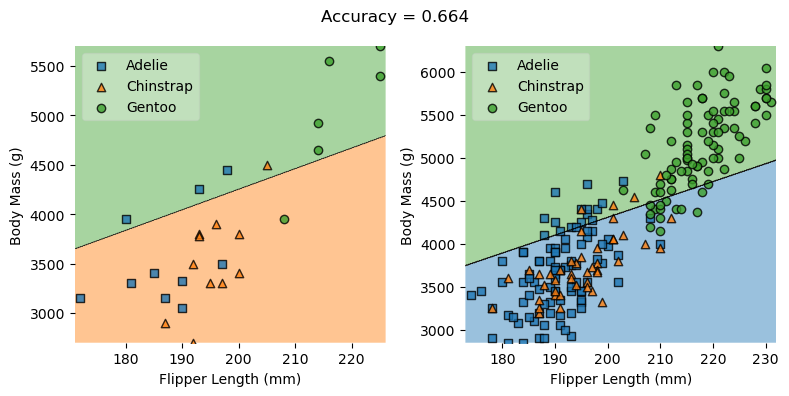

In [4]:
def decision_region_panel(X, y, model, qual_features):  
  p = len(qual_features)
  fig, axarr = plt.subplots(1, p, figsize=(4*p,4))
  for i in range(p):

      filler_feature_values = {2+j: 0 for j in range(p)}

      filler_feature_values.update({2+i: 1})

      ix = X[qual_features[i]] == 1

      ax = axarr[i]

      plot_decision_regions(np.array(X[ix]), y[ix], clf=model,
                            filler_feature_values=filler_feature_values,
                            filler_feature_ranges={2+j: 0.1 for j in range(p)},
                            legend=2, ax=ax)

      ax.set_xlabel(X.columns[0])
      ax.set_ylabel(X.columns[1])

      handles, labels = ax.get_legend_handles_labels()
      ax.legend(handles, 
          ["Adelie", "Chinstrap", "Gentoo"], 
           framealpha=0.3, scatterpoints=1)

  # Adding axes annotations
  fig.suptitle(f'Accuracy = {model.score(X, y).round(3)}')
  plt.tight_layout()
  plt.show()
    
    
qual_features = ["Clutch Completion_No", "Clutch Completion_Yes"]
decision_region_panel(X_train[cols], y_train, LR, qual_features)

# to do 

one interesting displayed figure with pandas.groupby().aggregate maybe, discussion of figure and table

model: three features of data and model trained on those features that achieves 100% testing accuracy (reproducible process, code up a search)
*one must be qualitative*
*two must be quantitative*

evaluate: show decision regions of your finished model, split out by qualitative feature

In [18]:
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,41.1,17.5,190.0,3900.0,8.94365,-26.06943,0,1,0,1,0,1,0,1
270,45.4,14.6,211.0,4800.0,8.24515,-25.46782,1,0,0,1,0,1,1,0
271,36.2,17.2,187.0,3150.0,9.04296,-26.19444,0,0,1,1,1,0,1,0
272,50.0,15.9,224.0,5350.0,8.20042,-26.39677,1,0,0,1,0,1,0,1


In [34]:
#one interesting displayed table w/ pandas.groupby().aggregate, discussion of figure/table

X_train.groupby('Sex_FEMALE')['Body Mass (g)'].mean()


Sex_FEMALE
0    4613.076923
1    3823.214286
Name: Body Mass (g), dtype: float64

## Sex v. Body Mass (g)

From this aggregation, it is clear the body mass of male penguins is significantly larger than the mass of female penguins. I hypothesized as much, but was curious how mean body mass' compared between female and male penguins. On average, male penguins are approximately 800 grams larger than female penguins. This is interesting, not for prediction of species (unless number of females and males is an indicator for species, which is something to explore later), but for prediction of gender. 

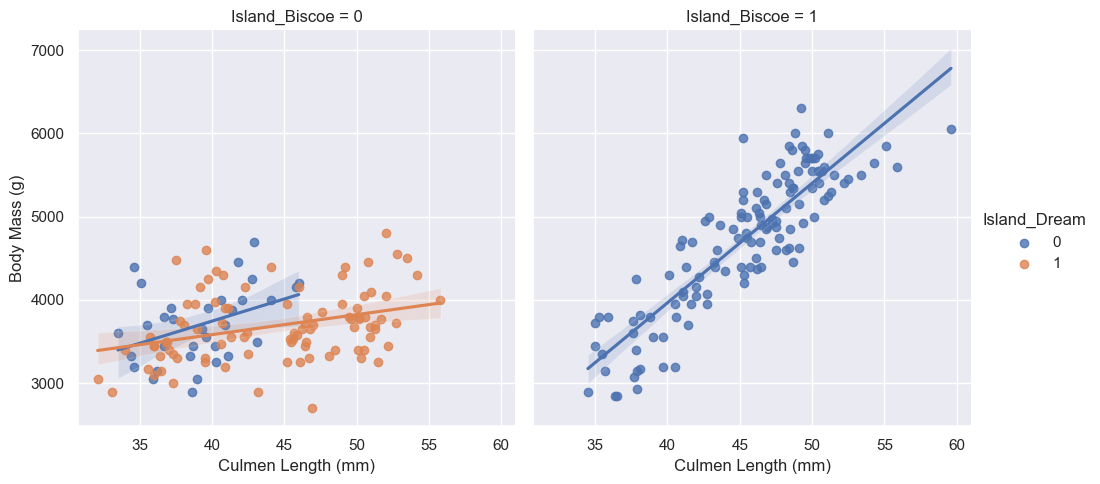

In [31]:
# one interesting displayed figure with seaborn + discussion

import seaborn as sns

sns.set_theme()

sns.lmplot(
data=X_train, 
x="Culmen Length (mm)",y="Body Mass (g)", col = "Island_Biscoe",
hue="Island_Dream")

## Displayed Figure, Looking at Relationship between Culmen Length and Body Mass per Island

The figures above describe the relationship between Culmen Length (mm) and Body Mass (g) in the penguins found in each island. On the left, the relationship for penguins on Dream Island and Togerson Island is shown (orange being Dream Island, blue being Torgerson Island). On the right, the relationship for penguins on Biscoe Island is shown. It is clear that on Biscoe Island there is a pretty linear relationship between increasing Culmen Length and increasing Body Mass. This is curious, as it points to perhaps a more homogenous penguin species population on Biscoe Island -- the relationship is consistent for the majority of penguins on the island. Looking at Dream and Torgerson Island on the left, there is almost no relationship between Culmen Length and Body Mass. This could mean a few things; there is a wide variety of penguin species on the two islands, affecting the linearity of the relationship between the two features, or the species of penguin typically found on the two islands does not increase in Body Mass with an increase in Culmen Length. 